In [348]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [349]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [350]:
from sklearn import preprocessing
data = pd.read_csv('/content/existing_base_train.csv')

data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,Female,North West,151.55000,81.79000,136.02000,360.37000,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,Female,North West,44.28000,13.91000,29.23000,89.22000,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00000,24.46000,0.00000,18.44000,0.00000,0.00000,0.02000,10.46000,0.00000,0.00000,0.00000,Female,South West,8.58000,1.75000,4.82000,14.50000,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99000,0.00000,0.00000,0.00000,29.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Female,Scotland,15.00000,0.00000,5.00000,68.98000,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.98000,0.00000,0.00000,0.00000,Female,Unknown,0.00000,1.66000,1.66000,1.88000,2


In [351]:

label_encoder = preprocessing.LabelEncoder()
data['age_band'] = label_encoder.fit_transform(data['age_band'])
data['status'] = label_encoder.fit_transform(data['status'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['occupation_partner'] = label_encoder.fit_transform(data['occupation_partner'])
data['home_status'] = label_encoder.fit_transform(data['home_status'])
data['family_income'] = label_encoder.fit_transform(data['family_income'])
data['self_employed'] = label_encoder.fit_transform(data['self_employed'])
data['self_employed_partner'] = label_encoder.fit_transform(data['self_employed_partner'])
data['TVarea'] = label_encoder.fit_transform(data['TVarea'])
data['post_code'] = label_encoder.fit_transform(data['post_code'])
data['post_area'] = label_encoder.fit_transform(data['post_area'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['region'] = label_encoder.fit_transform(data['region'])



In [352]:
data_op = pd.read_csv('/content/existing_base_test.csv')


data_op['age_band'] = label_encoder.fit_transform(data_op['age_band'])
data_op['status'] = label_encoder.fit_transform(data_op['status'])
data_op['occupation'] = label_encoder.fit_transform(data_op['occupation'])
data_op['occupation_partner'] = label_encoder.fit_transform(data_op['occupation_partner'])
data_op['home_status'] = label_encoder.fit_transform(data_op['home_status'])
data_op['family_income'] = label_encoder.fit_transform(data_op['family_income'])
data_op['self_employed'] = label_encoder.fit_transform(data_op['self_employed'])
data_op['self_employed_partner'] = label_encoder.fit_transform(data_op['self_employed_partner'])
data_op['TVarea'] = label_encoder.fit_transform(data_op['TVarea'])
data_op['post_code'] = label_encoder.fit_transform(data_op['post_code'])
data_op['post_area'] = label_encoder.fit_transform(data_op['post_area'])
data_op['gender'] = label_encoder.fit_transform(data_op['gender'])
data_op['region'] = label_encoder.fit_transform(data_op['region'])


In [353]:
data.head(2)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,3,1,4,4,1,11,0,0,1981,7,4628,1083,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,0,5,151.55000,81.79000,136.02000,360.37000,2
1,9091,Zero,6,1,6,4,1,11,0,0,1997,7,3768,930,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,0,5,44.28000,13.91000,29.23000,89.22000,2


In [354]:
data_op.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,11,1,5,1,1,3,0,0,1973,7,146,82,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,1,8,40.48000,15.07000,28.40000,83.05000
1,7897,Zero,3,1,8,0,1,11,0,0,1996,0,322,184,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,1,7,27.07000,72.01000,82.74000,235.29000
2,4729,Zero,11,1,1,5,1,4,0,0,1958,6,79,46,0.00000,154.47000,0.00000,67.47000,0.00000,87.83000,0.00000,107.88000,0.00000,0.00000,0.00000,0,8,44.39000,32.62000,43.86000,98.38000
3,6914,1,1,1,3,3,1,5,0,0,1993,4,4,3,18.98000,60.98000,0.00000,17.99000,9.99000,0.00000,102.43000,44.96000,0.00000,0.00000,0.00000,0,6,21.59000,24.57000,29.23000,86.32000
4,2795,Zero,10,4,5,8,1,0,0,0,1976,7,1474,825,0.00000,144.90000,0.00000,123.38000,0.00000,32.98000,0.00000,33.96000,6.99000,17.93000,5.45000,0,7,53.66000,16.22000,32.89000,102.99000


In [355]:

data.reset_index(inplace = True)
data.replace('Zero', 0, inplace = True)
data.replace('4+', 4, inplace = True) 
data.head(15)

data_op.reset_index(inplace = True)
data_op.replace('Zero', 0, inplace = True)
data_op.replace('4+', 4, inplace = True) 
data_op.head(15)

,index,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0,697,0,11,1,5,1,1,3,0,0,1973,7,146,82,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,1,8,40.48000,15.07000,28.40000,83.05000
1,1,7897,0,3,1,8,0,1,11,0,0,1996,0,322,184,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,1,7,27.07000,72.01000,82.74000,235.29000
2,2,4729,0,11,1,1,5,1,4,0,0,1958,6,79,46,0.00000,154.47000,0.00000,67.47000,0.00000,87.83000,0.00000,107.88000,0.00000,0.00000,0.00000,0,8,44.39000,32.62000,43.86000,98.38000
3,3,6914,1,1,1,3,3,1,5,0,0,1993,4,4,3,18.98000,60.98000,0.00000,17.99000,9.99000,0.00000,102.43000,44.96000,0.00000,0.00000,0.00000,0,6,21.59000,24.57000,29.23000,86.32000
4,4,2795,0,10,4,5,8,1,0,0,0,1976,7,1474,825,0.00000,144.90000,0.00000,123.38000,0.00000,32.98000,0.00000,33.96000,6.99000,17.93000,5.45000,0,7,53.66000,16.22000,32.89000,102.99000
5,5,7367,1,4,1,6,4,1,7,0,0,1989,10,453,267,0.00000,24.48000,29.99000,99.42000,0.00000,112.38000,199.31000,67.43000,0.00000,5.47000,0.00000,0,3,30.78000,64.10000,79.76000,132.74000
6,6,9598,0,7,4,6,8,1,6,0,0,1995,13,2009,1133,0.00000,0.00000,24.99000,0.00000,0.00000,0.00000,0.00000,0.00000,5.98000,0.00000,0.00000,0,9,5.00000,1.00000,1.00000,6.55000
7,7,6704,2,4,1,6,4,1,11,0,0,1978,13,127,70,145.48000,30.00000,14.99000,124.96000,29.47000,18.48000,37.95000,43.98000,3.00000,0.00000,0.00000,0,9,68.98000,17.24000,42.97000,154.46000
8,8,4933,3,3,1,6,4,1,11,0,0,1984,5,1529,846,0.00000,0.51000,0.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4,0.10000,0.00000,0.00000,22.35000
9,9,9880,2,6,1,6,2,1,5,0,0,1979,0,1154,644,15.99000,40.98000,0.51000,326.81000,47.46000,84.47000,0.00000,127.36000,0.00000,0.00000,0.00000,0,4,86.35000,35.31000,97.68000,200.36000


In [356]:

data.describe()

,index,REF_NO,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000
mean,4061.50000,5797.34330,5.78471,1.23658,4.00098,4.50677,1.09909,7.30625,0.07152,0.11288,1967.87691,5.74655,4023.86411,971.85106,23.25109,46.08292,27.28465,65.31794,18.82620,31.83802,25.41583,41.72363,6.05725,4.41691,19.19866,0.25222,7.12691,36.15275,21.44248,31.53065,89.35337,1.89414
std,2345.34113,3322.49757,2.76754,0.84100,2.09012,2.50216,0.46112,3.43999,0.25770,0.31646,182.56379,3.81715,2326.07226,550.10450,51.14750,79.08469,54.13354,95.76245,32.02233,45.24944,85.13015,64.41602,12.67337,9.94575,92.34313,0.44301,3.03146,42.47495,32.26166,39.48066,108.30354,0.30768
min,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-78.43000,1.00000
25%,2030.75000,2924.75000,4.00000,1.00000,3.00000,2.00000,1.00000,4.00000,0.00000,0.00000,1978.00000,3.00000,2004.75000,506.75000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,8.28250,4.66000,8.74000,26.27750,2.00000
50%,4061.50000,5811.50000,6.00000,1.00000,4.00000,4.00000,1.00000,8.00000,0.00000,0.00000,1988.00000,5.00000,4021.50000,974.00000,0.00000,17.48500,0.00000,31.47500,0.01000,14.98000,0.00000,23.48000,0.00000,0.00000,0.00000,0.00000,8.00000,23.59000,12.82000,21.14000,65.56000,2.00000
75%,6092.25000,8681.50000,8.00000,1.00000,5.00000,6.00000,1.00000,11.00000,0.00000,0.00000,1994.00000,8.00000,6042.25000,1436.00000,23.48000,64.99000,34.49000,92.88750,26.97000,45.92250,20.82750,59.44000,5.49000,4.49000,7.48000,0.00000,9.00000,49.79500,27.97250,42.39250,123.97000,2.00000
max,8123.00000,11518.00000,12.00000,4.00000,8.00000,8.00000,4.00000,12.00000,1.00000,1.00000,1999.00000,13.00000,8049.00000,1936.00000,662.26000,2951.76000,784.82000,2930.41000,591.04000,626.24000,4905.93000,2561.27000,156.87000,162.35000,4306.42000,2.00000,12.00000,1231.09000,1279.10000,1771.16000,4283.56000,2.00000


In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 33 columns):
index                              8124 non-null int64
REF_NO                             8124 non-null int64
children                           8124 non-null object
age_band                           8124 non-null int64
status                             8124 non-null int64
occupation                         8124 non-null int64
occupation_partner                 8124 non-null int64
home_status                        8124 non-null int64
family_income                      8124 non-null int64
self_employed                      8124 non-null int64
self_employed_partner              8124 non-null int64
year_last_moved                    8124 non-null int64
TVarea                             8124 non-null int64
post_code                          8124 non-null int64
post_area                          8124 non-null int64
Average_Credit_Card_Transaction    8124 non-null float64
Balance_Tr

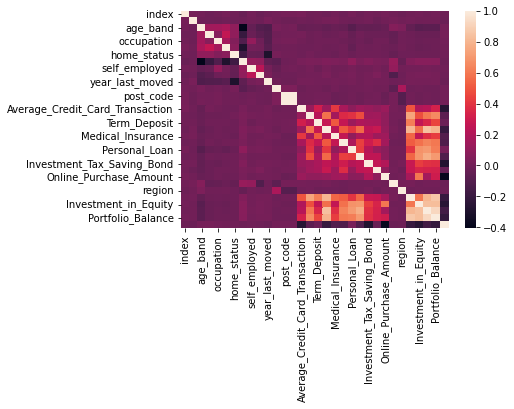

In [358]:
sns.heatmap(data.corr())

In [359]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
  
    print(); print(to_drop)


['post_area', 'Portfolio_Balance']


In [360]:


data.drop(data[to_drop], axis=1,inplace = True)


data_op.drop(data_op[to_drop], axis=1,inplace = True)


In [361]:
print(data.head(2))

   index  REF_NO children  age_band  status  occupation  occupation_partner  \
0      0    5466        2         3       1           4                   4   
1      1    9091        0         6       1           6                   4   

   home_status  family_income  self_employed  self_employed_partner  \
0            1             11              0                      0   
1            1             11              0                      0   

   year_last_moved  TVarea  post_code  Average_Credit_Card_Transaction  \
0             1981       7       4628                         26.98000   
1             1997       7       3768                         35.98000   

   Balance_Transfer  Term_Deposit  Life_Insurance  Medical_Insurance  \
0          29.99000     312.25000       299.79000           88.72000   
1          74.48000       0.00000        99.96000           10.99000   

   Average_A/C_Balance  Personal_Loan  Investment_in_Mutual_Fund  \
0            108.85000      175.43000   

In [362]:
y=data["Revenue_Grid"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Revenue_Grid, dtype: int64

In [363]:
x=pd.DataFrame(data)
x.drop("Revenue_Grid",axis =1,inplace=True)
x.head()

,index,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative
0,0,5466,2,3,1,4,4,1,11,0,0,1981,7,4628,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,0,5,151.55000,81.79000,136.02000
1,1,9091,0,6,1,6,4,1,11,0,0,1997,7,3768,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,0,5,44.28000,13.91000,29.23000
2,2,9744,1,4,1,2,2,2,7,1,1,1996,6,7044,0.00000,24.46000,0.00000,18.44000,0.00000,0.00000,0.02000,10.46000,0.00000,0.00000,0.00000,0,9,8.58000,1.75000,4.82000
3,3,10700,2,3,1,2,2,1,8,0,0,1990,8,2439,44.99000,0.00000,0.00000,0.00000,29.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,7,15.00000,0.00000,5.00000
4,4,1987,0,8,1,1,4,1,11,0,0,1989,13,4222,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.98000,0.00000,0.00000,0.00000,0,10,0.00000,1.66000,1.66000


In [364]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 3)


In [365]:
#sns.pairplot(data)


In [366]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6499, 30)
(6499,)
(1625, 30)
(1625,)


In [367]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(data_op)
#x_test = sc.transform(x_test)

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()

#param_grid = {'criterion': ['gini','entropy'],
#                  'max_depth': list(range(90,200)),
#                'n_estimators': list(range(90,200)),
#                  'max_features': ['auto', 'sqrt', 'log2'],
#                  'min_samples_split': list(range(5,20))}

#cv = RandomizedSearchCV(lr, param_grid, cv= 5)


lr.fit(x_train,y_train)




LogisticRegression()

In [370]:
y_test_pred_op = lr.predict(data_op)


In [371]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

,0
0,1
1,1


In [372]:
op = pd.DataFrame(data_op["REF_NO"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('REF_NO')   

op[op.columns[1]] = op[op.columns[1]].astype("Int64")


op.head(2)


,REF_NO,0
0,697,1
1,7897,1


In [373]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [374]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [375]:
x_test.shape

(2031, 30)

In [376]:
#print(cv.best_score_)
#print(cv.best_params_)
#print(cv.best_estimator_)

In [377]:
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model

print(accuracy_score(y_test,y_test_pred))

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix


confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report                   # To generate classification report


train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)